<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da10_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. 한글 폰트 설치

In [1]:
# Jupyter notebook 환경에서 리눅스 명령어 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,459 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## Step 2. Colab Runtime 재시작(Ctrl+M)

## Step 3. matplotlib 패키지에서 한글 폰트를 사용할 수 있도록 설정

In [1]:
import matplotlib.pyplot as plt

# pyplot에서 나눔바른고딕 폰트를 사용하도록 설정
plt.rc('font', family='NanumBarunGothic')

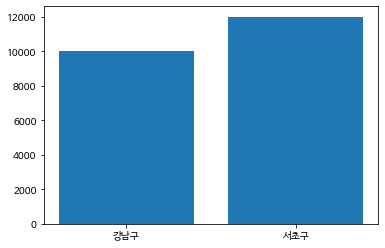

In [4]:
# 한글 폰트 테스트
import pandas as pd

df = pd.DataFrame({'gu': ['강남구', '서초구'],
                   'price': [10_000, 12_000]})

plt.bar(x=df['gu'], height=df['price'])
plt.show()

# 아파트 매매가 분석


*   [apt_201910.csv](https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력


## 라이브러리 import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 프레임 생성

In [6]:
file= 'https://github.com/JakeOh/202205_itw_bd34/raw/main/datasets/apt_201910.csv'

In [13]:
apt = pd.read_csv(file, encoding='cp949', thousands=',')
# encoding: 파일에서 사용된 문자열 셋의 종류. 기본값은 'utf-8'.
# 한글 MS-Windows의 기본 텍스트 인코딩은 'cp949'.
# thousands: 숫자에서 천자리 구분자가 사용되고 있을 때

In [14]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [15]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [ ]:
# apt['가격'].str.replace(',', '').astype('int')

In [16]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


## 데이터 탐색

In [17]:
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


### 아파트 가격의 분포 시각화

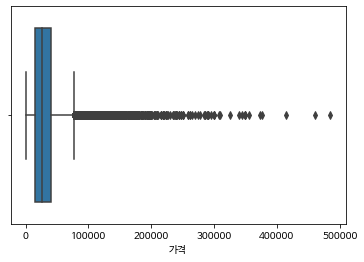

In [18]:
sns.boxplot(x='가격', data=apt)
plt.show()

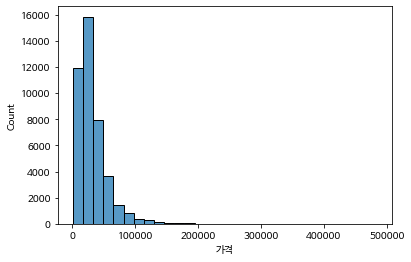

In [20]:
sns.histplot(x='가격', data=apt, bins=30)
plt.show()

### 아파트 면적 분포 시각화

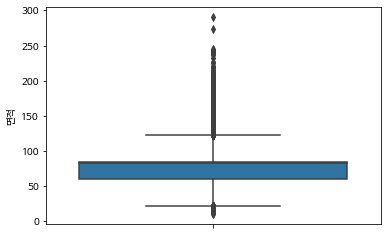

In [21]:
sns.boxplot(y='면적', data=apt)
plt.show()

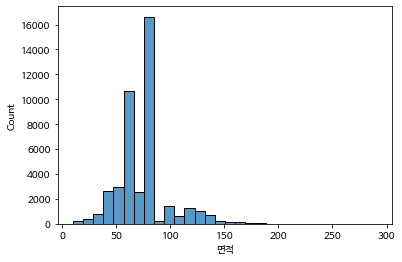

In [23]:
sns.histplot(x='면적', data=apt, bins=30)
plt.show()

## 파생 변수 추가

### 광역시도 파생변수

In [24]:
apt['시군구']

0         강원도 강릉시 견소동
1         강원도 강릉시 견소동
2         강원도 강릉시 견소동
3         강원도 강릉시 견소동
4         강원도 강릉시 견소동
             ...     
42753    충청북도 충주시 호암동
42754    충청북도 충주시 호암동
42755    충청북도 충주시 호암동
42756    충청북도 충주시 호암동
42757    충청북도 충주시 호암동
Name: 시군구, Length: 42758, dtype: object

In [27]:
'강원도 강릉시 견소동'.split()

['강원도', '강릉시', '견소동']

In [29]:
apt['시군구'].str.split().str[0]

0         강원도
1         강원도
2         강원도
3         강원도
4         강원도
         ... 
42753    충청북도
42754    충청북도
42755    충청북도
42756    충청북도
42757    충청북도
Name: 시군구, Length: 42758, dtype: object

In [30]:
apt['province'] = apt['시군구'].str.split().str[0]

In [31]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도


In [32]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28,충청북도
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32,충청북도
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32,충청북도
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32,충청북도
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32,충청북도


In [33]:
apt['province'].value_counts()

경기도        12126
서울특별시       4701
경상남도        2955
인천광역시       2761
부산광역시       2752
대전광역시       2487
충청남도        2045
경상북도        1985
대구광역시       1969
광주광역시       1588
충청북도        1576
울산광역시       1562
전라북도        1394
전라남도        1234
강원도         1143
세종특별자치시      315
제주특별자치도      165
Name: province, dtype: int64

In [34]:
# value_count()의 결과인 Series를 인덱스 오름차순으로 정렬
apt['province'].value_counts().sort_index()

강원도         1143
경기도        12126
경상남도        2955
경상북도        1985
광주광역시       1588
대구광역시       1969
대전광역시       2487
부산광역시       2752
서울특별시       4701
세종특별자치시      315
울산광역시       1562
인천광역시       2761
전라남도        1234
전라북도        1394
제주특별자치도      165
충청남도        2045
충청북도        1576
Name: province, dtype: int64

### 시군구 파생변수

In [35]:
apt['county'] = apt['시군구'].str.split().str[1]

In [36]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시


In [37]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32,충청북도,충주시


In [38]:
apt['county'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [39]:
apt['dong'] = apt['시군구'].str.split().str[-1]

In [40]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동


### 연도/월 파생 변수

In [41]:
apt['year'] = apt['계약년월'] // 100
apt['month'] = apt['계약년월'] % 100

In [42]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10


## 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값

In [43]:
seoul_apt = apt[apt['province'] == '서울특별시']

In [44]:
seoul_apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,강남구,개포동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,중랑구,중화동,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,중랑구,중화동,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,중랑구,중화동,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,중랑구,중화동,2019,10


In [45]:
apt[apt['시군구'].str.startswith('서울')]

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,강남구,개포동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,중랑구,중화동,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,중랑구,중화동,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,중랑구,중화동,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,중랑구,중화동,2019,10


In [46]:
seoul_apt['가격'].describe()

count      4701.000000
mean      69302.919166
std       42599.162101
min        8500.000000
25%       41500.000000
50%       60000.000000
75%       84500.000000
max      485000.000000
Name: 가격, dtype: float64

In [47]:
seoul_apt['가격'].min()

8500

### 서울시 동별 통계

In [52]:
seoul_apt_by_dong = seoul_apt.groupby('dong')['가격'].agg(['count', 'mean', 'min', 'median', 'max'])
seoul_apt_by_dong

,count,mean,min,median,max
dong,,,,,
가락동,22,78695.454545,16000,79750.0,110000
가산동,6,40550.000000,20300,47250.0,53500
가양동,43,49988.372093,33500,44750.0,114000
갈현동,5,38400.000000,27000,30000.0,60000
강일동,19,67026.315789,58500,66900.0,85000
...,...,...,...,...,...
회현동1가,3,125500.000000,113000,120000.0,143500
효창동,6,87500.000000,59000,75500.0,130000
후암동,3,78066.666667,30200,75000.0,129000


### 거래 건수 상위 10개 지역

In [54]:
count_top10 = seoul_apt_by_dong.sort_values(by='count', ascending=False).head(10)
count_top10

,count,mean,min,median,max
dong,,,,,
상계동,198,40474.242424,23200,38000.0,78000
구로동,120,47075.250000,9800,46175.0,118000
중계동,108,46145.740741,16300,39000.0,97000
시흥동,101,39634.435644,9000,38600.0,86000
봉천동,97,56228.340206,13000,59500.0,89900
신월동,78,41164.102564,17500,38775.0,79000
공릉동,78,37887.179487,8500,36000.0,71500
신정동,77,74342.207792,29950,69000.0,176000
창동,76,44913.815789,18700,42000.0,88000


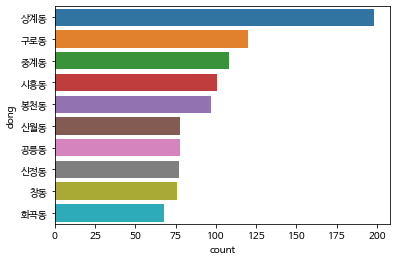

In [56]:
sns.barplot(x='count', y=count_top10.index, data=count_top10)
plt.show()

### 아파트 거래 가격의 평균 상위 10개 지역(동)

In [60]:
mean_top10 = seoul_apt_by_dong.sort_values(by='mean', ascending=False).head(10)
mean_top10

,count,mean,min,median,max
dong,,,,,
압구정동,10,263250.000000,170000,249500.0,355000
반포동,17,224200.000000,87700,210700.0,415000
잠원동,15,194313.333333,109000,178000.0,295000
대치동,22,192795.454545,30000,190000.0,373000
잠실동,22,191459.090909,145000,191250.0,308000
홍파동,2,176500.000000,159000,176500.0,194000
한강로3가,1,175000.000000,175000,175000.0,175000
여의도동,8,172562.500000,105000,164000.0,259000
청담동,10,170200.000000,75000,173500.0,300000


거래 건수가 10건 이상인 지역(동)에서 거래 가격 평균 상위 10개 지역

In [62]:
mean_top10 = seoul_apt_by_dong[seoul_apt_by_dong['count'] >= 10].sort_values(by='mean', ascending=False).head(10)
mean_top10

,count,mean,min,median,max
dong,,,,,
압구정동,10,263250.000000,170000,249500.0,355000
반포동,17,224200.000000,87700,210700.0,415000
잠원동,15,194313.333333,109000,178000.0,295000
대치동,22,192795.454545,30000,190000.0,373000
잠실동,22,191459.090909,145000,191250.0,308000
청담동,10,170200.000000,75000,173500.0,300000
도곡동,23,169347.826087,31800,155000.0,461000
신천동,11,154681.818182,82000,158000.0,227500
방배동,31,142812.903226,57000,128000.0,250000


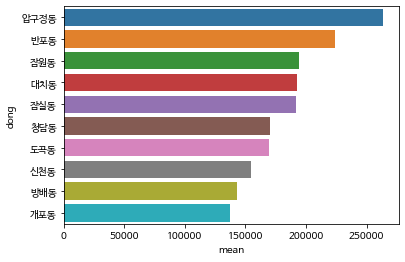

In [63]:
sns.barplot(x='mean', y=mean_top10.index, data=mean_top10)
plt.show()

### 아파트 거래 가격 최댓값 상위 10개 지역(동)

In [64]:
max_top10 = seoul_apt_by_dong.sort_values(by='max', ascending=False).head(10)
max_top10

,count,mean,min,median,max
dong,,,,,
한남동,6,159666.666667,27000,100500.0,485000
도곡동,23,169347.826087,31800,155000.0,461000
반포동,17,224200.000000,87700,210700.0,415000
대치동,22,192795.454545,30000,190000.0,373000
압구정동,10,263250.000000,170000,249500.0,355000
잠실동,22,191459.090909,145000,191250.0,308000
청담동,10,170200.000000,75000,173500.0,300000
잠원동,15,194313.333333,109000,178000.0,295000
삼성동,7,168714.285714,103000,150000.0,290000


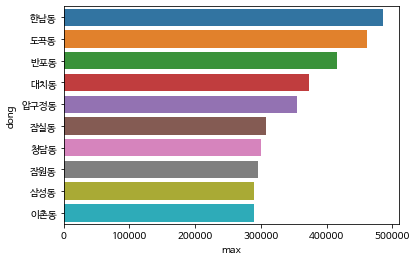

In [65]:
sns.barplot(x='max', y=max_top10.index, data=max_top10)
plt.show()

서울 구별 아파트 거래 건수, 거래 가격 평균, 최솟값, 중앙값, 최댓값